In [2]:
# get the images from the folder, and extract the features from the images
source_folder = 'images_data/'

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import cv2
import numpy as np

# Charger l'image
image = cv2.imread(os.path.join(source_folder, 'image_.jpg'))

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Obtenir les valeurs uniques des pixels
unique_pixel_values = np.unique(gray_image)

# Afficher les valeurs uniques
print("Valeurs uniques des pixels :")
print(unique_pixel_values)




Valeurs uniques des pixels :
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


Unique grayscale values in the mask:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


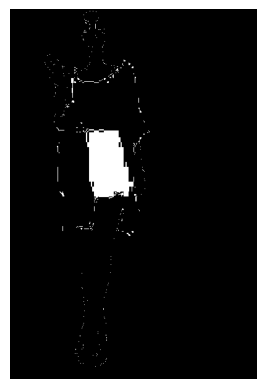

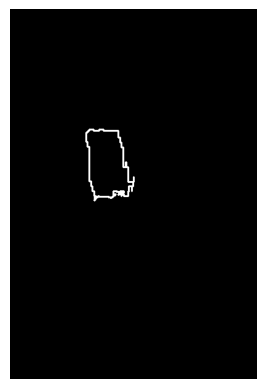

In [5]:
import cv2
import numpy as np

source_folder = 'images_data/'
# Load your grayscale mask image
gray_mask = cv2.imread(os.path.join(source_folder, 'image_.jpg'), cv2.IMREAD_GRAYSCALE)

# Get unique pixel values in the grayscale image
unique_values = np.unique(gray_mask)

# Print the unique grayscale values
print("Unique grayscale values in the mask:")
print(unique_values)


pixels_equal_to = gray_mask == 5

# Show the binary mask
plt.imshow(pixels_equal_to, cmap='gray')
plt.axis('off')
plt.show()

# get contour of the mask of pixel value 4
contours, hierarchy = cv2.findContours(pixels_equal_to.astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contour on the mask image, show the contour on an empty image
contour_image = np.zeros(gray_mask.shape)
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 3)

# from the contour, only keep the largest contour
# Get the largest contour
max_contour = max(contours, key=cv2.contourArea)

# Create an empty image to draw the largest contour
max_contour_image = np.zeros(gray_mask.shape)

# Draw the largest contour
cv2.drawContours(max_contour_image, [max_contour], -1, (255, 255, 255), 3)

# get the bounding box of the largest contour
x, y, w, h = cv2.boundingRect(max_contour)

# Draw the bounding box
bounding_box_image = cv2.rectangle(max_contour_image, (x, y), (x + w, y + h), (255, 255, 255), 2)
polygon_contour = max_contour.squeeze()

# Draw the polygon contour
polygon_contour_image = np.zeros(gray_mask.shape)
cv2.polylines(polygon_contour_image, [polygon_contour], True, (255, 255, 255), 2)

# Show the polygon contour
plt.imshow(polygon_contour_image, cmap='gray')
plt.axis('off')
plt.show()

    

In [57]:
def mask_to_yolo(mask_path, label_map, output_path):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    for pixel_value in range(1, len(label_map)):
        pixels_equal_to = mask == pixel_value
        contours, hierarchy = cv2.findContours(pixels_equal_to.astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            max_contour = max(contours, key=cv2.contourArea)
            polygon_contour = max_contour.squeeze()
            polygon_contour = polygon_contour.tolist()
            polygon_contour = [[x, y] for x, y in polygon_contour]
            normalized_polygon_contour = [[x / mask.shape[1], y / mask.shape[0]] for x, y in polygon_contour]
            with open(output_path, 'a') as f:  # Open the file in append mode
                f.write(f'{pixel_value} ')
                for x, y in normalized_polygon_contour:
                    f.write(f'{x} {y} ')
                f.write('\n')

# Example usage
label_map = {
    "0": "Background", "1": "Hat", "2": "Hair", "3": "Sunglasses",
    "4": "Upper-clothes", "5": "Skirt", "6": "Pants", "7": "Dress",
    "8": "Belt", "9": "Left-shoe", "10": "Right-shoe", "11": "Face",
    "12": "Left-leg", "13": "Right-leg", "14": "Left-arm", "15": "Right-arm",
    "16": "Bag", "17": "Scarf"
}

mask_to_yolo('images_data/image_.jpg', label_map, 'images_data/image_.txt')
